# Example for using concat operator on cmip6 decadal without average

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import operators as ops

## Check attributes of original decadal dataset

In [2]:
wf = ops.Subset(
        ops.Input(
                'tas', [
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r5i1p1f2.Amon.tas.gn.v20200417'
                ]
        ),
        time="1996-01-01/1996-01-31"
)

resp = wf.orchestrate()
resp.ok

True

In [3]:
dsets = resp.datasets()

In [4]:
ds = dsets[0]
ds

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lat: 324, lon: 432)
Coordinates:
  * time       (time) object 1996-01-16 00:00:00
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-05-26T09:33:34Z
    ...                     ...
    tracking_id:            hdl:21.14100/2b29c580-0356-4ced-bf2f-2a6554d4027c
    variable_id:            tas
    variable_name:          tas
    variant_label:          r5i1p1f2
    license:                CMIP6 model data produced by Met Office Hadley Ce...
    cmor_version:           3.4.0

In [5]:
ds.attrs.get('realization_index')

5

## Run concat

https://docs.xarray.dev/en/stable/generated/xarray.concat.html

In [6]:
wf = ops.Concat(
        ops.Input(
                'tas', [
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r1i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r2i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r3i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r4i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r5i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r6i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r7i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r8i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r9i1p1f2.Amon.tas.gn.v20200417',
                    'c3s-cmip6-decadal.DCPP.MOHC.HadGEM3-GC31-MM.dcppA-hindcast.s1995-r10i1p1f2.Amon.tas.gn.v20200417'
                ]
        ),
        dims="realization",
        time="1996-01-01/1996-01-31"
)

# skip optional average
# wf = ops.Average(wf, dims="realization")

# optional subset
wf = ops.Subset(wf, time="1996-01-01/1996-01-31")

resp = wf.orchestrate()
resp.ok

True

## open with xarray

In [7]:
resp.size_in_mb

2.5586843490600586

In [8]:
dsets = resp.datasets()

In [9]:
ds = dsets[0]
ds

<xarray.Dataset>
Dimensions:      (time: 1, realization: 10, bnds: 2, lat: 324, lon: 432)
Coordinates:
  * time         (time) object 1996-01-16 00:00:00
  * lat          (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon          (lon) float64 0.4167 1.25 2.083 2.917 ... 357.9 358.7 359.6
    height       float64 ...
    reftime      object ...
    leadtime     (time) timedelta64[ns] ...
  * realization  (realization) int32 10 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (realization, time, bnds) object ...
    lat_bnds     (realization, lat, bnds) float64 ...
    lon_bnds     (realization, lon, bnds) float64 ...
    tas          (realization, time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                 CF-1.7 CMIP-6.2
    activity_id:                 DCPP
    branch_method:               no parent
    branch_time_in_child:        0.0
    branch_time_in_parent:       0.0
    creation_date:               2020-05-26T09:37:30Z
    ...                          ...
    license:                     CMIP6 model data produced by Met Office Hadl...
    cmor_version:                3.4.0
    forcing_description:         f2, CMIP6 v6.2.0 forcings; no ozone remapping
    physics_description:         physics from the standard model configuratio...
    initialization_description:  hindcast initialized based on observations a...
    startdate:                   s199511

In [10]:
ds.cf

Coordinates:
             CF Axes: * X: ['lon']
                      * Y: ['lat']
                        Z: ['height']
                      * T: ['time']

      CF Coordinates: * longitude: ['lon']
                      * latitude: ['lat']
                        vertical: ['height']
                      * time: ['time']

       Cell Measures:   area, volume: n/a

      Standard Names:   forecast_period: ['leadtime']
                        forecast_reference_time: ['reftime']
                        height: ['height']
                      * latitude: ['lat']
                      * longitude: ['lon']
                      * realization: ['realization']
                      * time: ['time']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   air_temperature: ['tas']

              Bounds:   T: ['time_bnds']
                        X: ['lon_bnds']
                        Y: ['lat_bnds']
     

## provenance

In [11]:
prov_plot_url = resp.provenance_image()
prov_plot_url

'http://rook4.cloud.dkrz.de:80/outputs/rook/69125446-7f1b-11ee-b904-fa163ed6c06f/provenance.png'

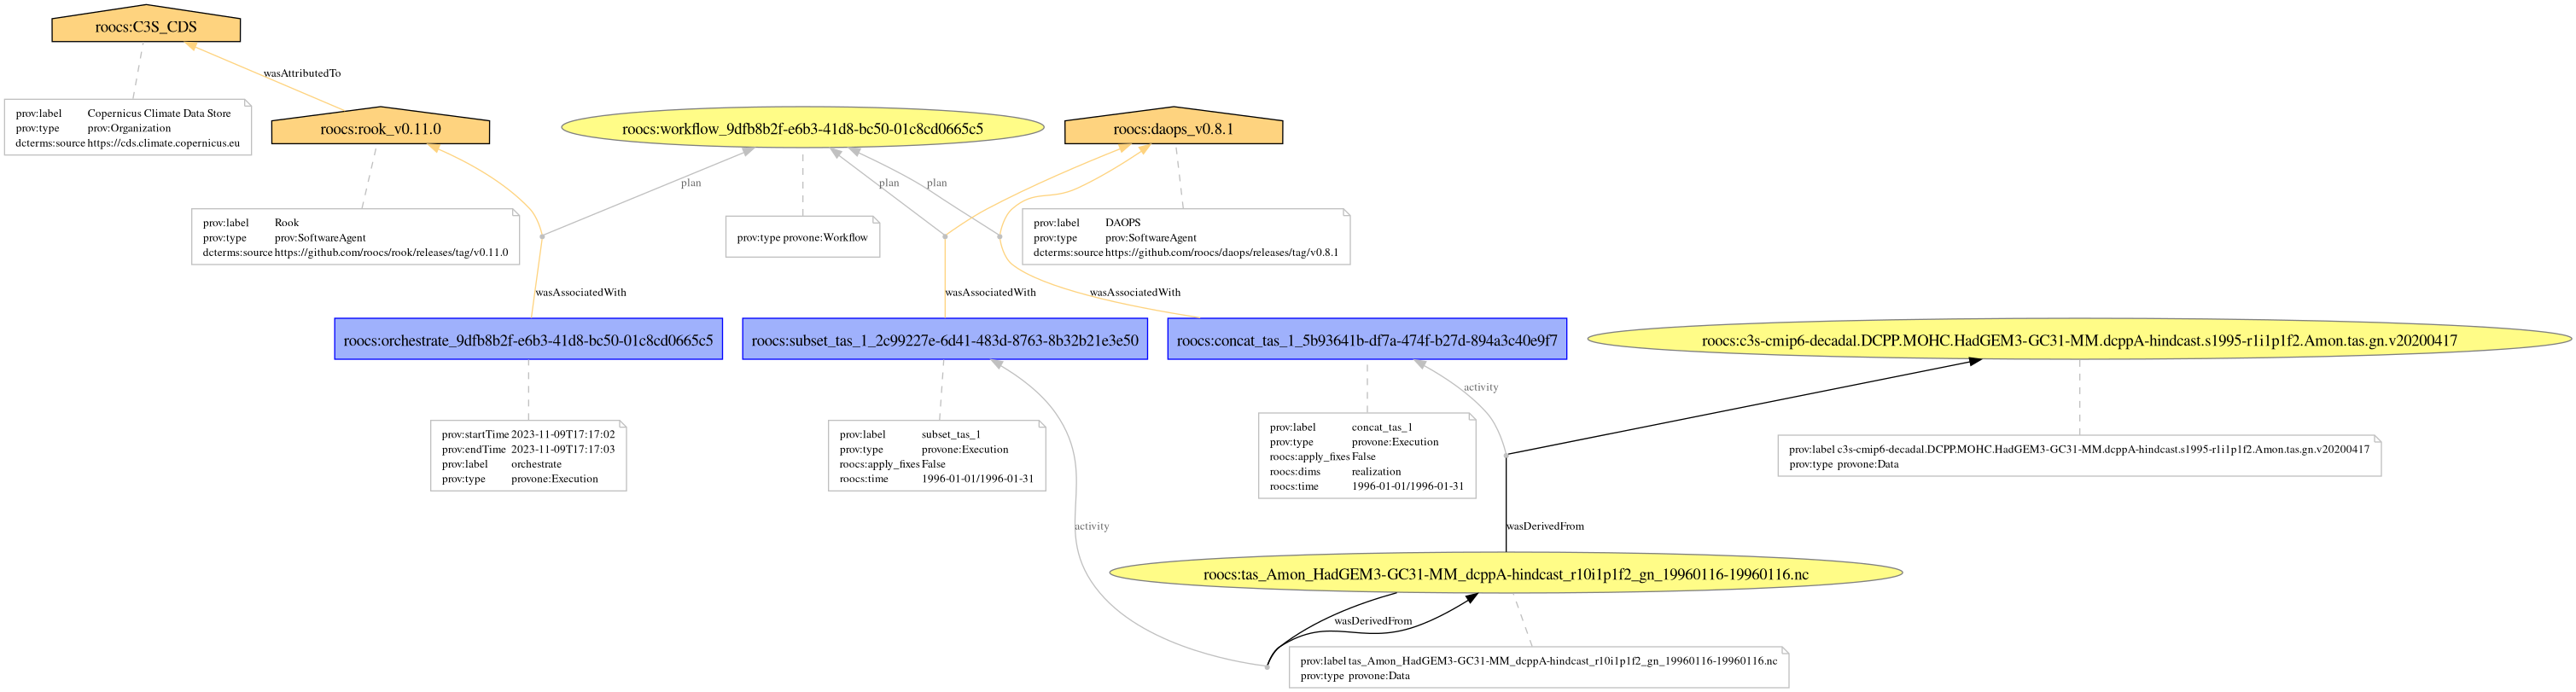

In [12]:
from IPython.display import Image
Image(prov_plot_url)

## select specific realization

using coordinate `realization`

In [13]:
print(ds.realization.values)

[10  1  2  3  4  5  6  7  8  9]


In [14]:
ds.realization.standard_name

'realization'

In [15]:
ds_r = ds.sel(realization=5)
ds_r

<xarray.Dataset>
Dimensions:      (time: 1, bnds: 2, lat: 324, lon: 432)
Coordinates:
  * time         (time) object 1996-01-16 00:00:00
  * lat          (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon          (lon) float64 0.4167 1.25 2.083 2.917 ... 357.9 358.7 359.6
    height       float64 1.5
    reftime      object 1995-11-01 00:00:00
    leadtime     (time) timedelta64[ns] 75 days
    realization  int32 5
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) object ...
    lat_bnds     (lat, bnds) float64 ...
    lon_bnds     (lon, bnds) float64 ...
    tas          (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                 CF-1.7 CMIP-6.2
    activity_id:                 DCPP
    branch_method:               no parent
    branch_time_in_child:        0.0
    branch_time_in_parent:       0.0
    creation_date:               2020-05-26T09:37:30Z
    ...                          ...
    license:                     CMIP6 model data produced by Met Office Hadl...
    cmor_version:                3.4.0
    forcing_description:         f2, CMIP6 v6.2.0 forcings; no ozone remapping
    physics_description:         physics from the standard model configuratio...
    initialization_description:  hindcast initialized based on observations a...
    startdate:                   s199511

In [16]:
print(ds_r.realization.values)

5
